# Taller 3

In [1]:
from IPython.display import Image

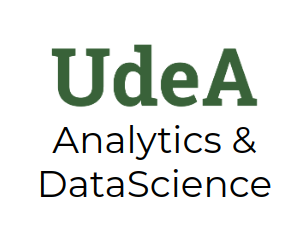

In [2]:
Image("../../docs/udea-datascience.png")

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

En este laboratorio deberán utilizar un API token generado por su perfil de Kaggle para descargar la base de datos directamente desde el sitio web. Deben almacenar el token dentro de su espacio en Google Drive.

In [3]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [4]:
#import os

#os.environ['KAGGLE_CONFIG_DIR'] = '/../../docs/' + input('Input the directory with your Kaggle json file: ') # Dejar input vacío en caso de que el archivo se encuentre en la raíz de Drive
#!kaggle datasets download -d shashwatwork/municipal-waste-management-cost-prediction # Descarga del archivo comprimido
#!unzip \*.zip && rm *.zip # Descomprensión y eliminación de cualquier archivo .zip

## Descripción de la base de datos 🚮

**Name:** Municipal Waste Management Cost Prediction

**Website:** https://www.kaggle.com/datasets/shashwatwork/municipal-waste-management-cost-prediction

**Description:** 

Municipal waste is defined as waste collected and treated by or for municipalities. It covers waste from households, including bulky waste, similar waste from commerce and trade, office buildings, institutions and small businesses, as well as yard and garden waste, street sweepings, the contents of litter containers, and market cleansing waste if managed as household waste. The definition excludes waste from municipal sewage networks and treatment, as well as waste from construction and demolition activities. This indicator is measured in thousand tonnes and in kilograms per capita.

**Data Credits** - Di Foggia, Giacomo (2022), “Municipal waste management cost and fee schemes ”, Mendeley Data, V1, doi: 10.17632/w5f9kg7743.1

Source - [Mendeley Data](https://board.unimib.it/datasets/w5f9kg7743/1)


**Attribute Information**

**Input variables:**

1. Variable Label
2. region Region
3. province Province
4. name Name of municipality
5. cres residual cost per capita
6. csor Sorted cost per caputa
7. istat National code
8. area km2
9. pop population
10. alt altitude m.s.l.
11. isle dummy municipality on isle
12. sea dummy coastal municipality
13. pden population density (people per km2)
14. wden waste per km2
15. urb urbanization index (1 low, 3 high)
16. fee fee scheme
17. d_fee dmmy PAYT
18. sample Reg with PAYT
19. organic organic %
20. paper paper%
21. glass glass %
22. wood wood %
23. metal metal %
24. plastic plastic %
25. raee raee %
26. texile texile %
27. other other %
28. msw_so msw sorted kg
29. msw_un msw unsorted kg
30. msw Municipal solid waste kg
31. sor Share of sorther waste
32. geo 1 South, 2 Center, 3 North
33. roads Km of roads within the municipality
34. s_wteregio Share of sw sent to W2E plants - regional figure
35. s_landfill share of waste to landifil
36. gdp Municipal revenues EUR (p) - log
37. proads People per km of roads (log)
38. wage Taxable income EUR (p) - log
39. finance Municipal revenues EUR (p) - log

**Output variable:**

40. tc Cost per capita eur

## Librerías

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline
plt.style.use('ggplot')

In [6]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [7]:
path = os.path.join('..', '..', 'data', 'public_data_waste_fee.csv')

In [8]:
df = pd.read_csv(path)

In [9]:
df.head()

,region,province,name,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,fee,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,PAYT,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,PAYT,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,PAYT,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,PAYT,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,STANDARD,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


In [10]:
df.shape

(4341, 39)

## Exploración de Datos

En este apartado, se debe cargar la base de datos y generar una exploración de datos, determinando si hay datos faltantes o no y generando un reporte de las estadísticas principales como la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada variable. Luego, se debe realizar una detección de datos atípicos con un algoritmo o método de su elección y además, analizar si es pertinente o no cambiar la escala de las características o variables.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      4341 non-null   object 
 1   province    4341 non-null   object 
 2   name        4335 non-null   object 
 3   tc          4341 non-null   float64
 4   cres        4289 non-null   float64
 5   csor        4274 non-null   float64
 6   istat       4341 non-null   int64  
 7   area        4335 non-null   float64
 8   pop         4341 non-null   int64  
 9   alt         4335 non-null   float64
 10  isle        4335 non-null   float64
 11  sea         4335 non-null   float64
 12  pden        4335 non-null   float64
 13  wden        4335 non-null   float64
 14  urb         4335 non-null   float64
 15  fee         4341 non-null   object 
 16  d_fee       4341 non-null   int64  
 17  sample      4341 non-null   int64  
 18  organic     3829 non-null   float64
 19  paper       4316 non-null  

In [12]:
def find_missing(tabla: pd.DataFrame, 
                 missing: str = None, 
                 nan_value: bool = False) -> pd.DataFrame:
    """Calcula el número y porcentaje de valores faltantes o NaN 
     en un DataFrame.

    Args:
        tabla (pd.DataFrame): DataFrame a analizar.
        missing (str, optional): Valor que se considera faltante. 
         Por defecto es None.
        nan_value (bool, optional): Si se deben buscar NaN. 
         Por defecto es False.

    Returns:
        pd.DataFrame: DataFrame que contiene el número y porcentaje 
        de valores faltantes o NaN por columna.

    """
    lista = []
    if missing:
        for col in tabla.columns:
            num = tabla[tabla[col] == missing].shape[0]
            lista.append(num)
            
    if nan_value:
        for col in tabla.columns:
            num = tabla[tabla[col].isnull()].shape[0]
            lista.append(num)     
    
    dic = {
        'Columnas': tabla.columns,
        'Faltantes': lista}
    df_faltantes = pd.DataFrame(dic)
    
    df_faltantes['Porcentaje'] = df_faltantes['Faltantes'] / tabla.shape[0]
    
    return df_faltantes

In [13]:
df_faltantes = find_missing(df, nan_value=True)

In [14]:
cond = df_faltantes['Faltantes'] > 0
df_faltantes[cond]

,Columnas,Faltantes,Porcentaje
2,name,6,0.001382
4,cres,52,0.011979
5,csor,67,0.015434
7,area,6,0.001382
9,alt,6,0.001382
10,isle,6,0.001382
11,sea,6,0.001382
12,pden,6,0.001382
13,wden,6,0.001382
14,urb,6,0.001382


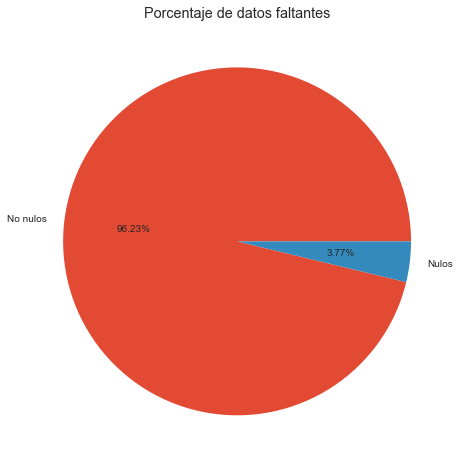

In [15]:
faltantes_total = df_faltantes['Faltantes'].sum()
registros_total = df.shape[0] * df.shape[1]

plt.figure(figsize=(8, 8))
datos = [registros_total - faltantes_total, faltantes_total]
label = ['No nulos', 'Nulos']

plt.pie(datos, labels=label, autopct='%.2f%%')
plt.title('Porcentaje de datos faltantes')
plt.show()

In [16]:
df.describe()

,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
count,4341.000000,4289.000000,4274.000000,4341.000000,4335.000000,4.341000e+03,4335.000000,4335.000000,4335.000000,4335.000000,4.335000e+03,4335.000000,4341.000000,4341.000000,3829.000000,4316.000000,4308.000000,3.246000e+03,4095.000000,4302.000000,4.027000e+03,3328.000000,4205.000000,4.341000e+03,4.341000e+03,4.341000e+03,4341.000000,4056.000000,3898.000000,4056.000000,4056.000000,3955.000000,3898.000000,4056.000000,3955.000000
mean,154.235761,54.179839,52.683058,47469.933195,40.995045,1.020384e+04,310.052134,0.005075,0.168397,405.048252,1.920578e+05,2.489965,0.128311,0.546879,22.275126,10.961268,9.406638,4.113458e+00,1.764422,6.112165,1.233116e+00,0.757019,7.941594,3.248581e+06,2.042522e+06,5.311340e+06,66.237153,2.290804,101.931121,21.867460,20.000860,7.231159,4.253962,9.446968,7.448094
std,76.069005,43.191121,33.063610,30089.798169,56.784025,5.342640e+04,280.534306,0.071066,0.374261,771.211960,3.590014e+05,0.594800,0.334475,0.497855,12.745305,3.883149,3.707605,2.716511e+00,1.350322,3.260301,8.212674e-01,0.688154,5.148638,1.562108e+07,1.764461e+07,3.254404e+07,17.730843,0.887611,309.985865,15.624688,21.371373,0.550041,1.155765,0.298122,0.566542
min,25.690001,4.270000,3.390000,1272.000000,0.120000,3.400000e+01,1.000000,0.000000,0.000000,2.479942,8.921848e+02,1.000000,0.000000,0.000000,0.013712,0.000011,0.000001,7.969198e-09,0.000005,0.000014,7.116594e-07,0.000001,0.029463,2.700000e-01,6.185000e+03,1.997200e+04,0.250000,1.000000,1.000000,0.000000,3.602713,6.035401,-3.366593,7.865574,6.216463
25%,108.040001,27.340000,31.252500,18135.000000,10.850000,1.579000e+03,80.000000,0.000000,0.000000,62.588707,2.357135e+04,2.000000,0.000000,0.000000,11.127275,8.655753,7.146507,2.086017e+00,0.876863,4.126096,7.768605e-01,0.346369,3.964847,3.739650e+05,1.751800e+05,6.116750e+05,57.830000,1.000000,25.000000,8.904969,4.551430,6.811210,3.497756,9.226408,7.015546
50%,136.619995,41.689999,48.875000,42015.000000,22.730000,3.535000e+03,240.000000,0.000000,0.000000,151.323624,6.834259e+04,3.000000,0.000000,1.000000,24.968554,10.879046,9.101589,4.023801e+00,1.540920,5.792268,1.175424e+00,0.629160,7.134908,1.040737e+06,4.090600e+05,1.524449e+06,70.840000,3.000000,51.000000,24.467649,11.296785,7.128087,4.356210,9.522799,7.341930
75%,179.160004,66.489998,66.435001,70049.000000,47.490002,8.199000e+03,459.000000,0.000000,0.000000,399.364822,1.946250e+05,3.000000,0.000000,1.000000,31.822420,13.061692,11.277510,5.707810e+00,2.350927,7.544721,1.568621e+00,0.990817,11.129960,2.725645e+06,1.056920e+06,3.954080e+06,79.090000,3.000000,105.000000,38.501492,31.493038,7.571133,5.075414,9.665145,7.798267
max,977.419983,670.320007,582.159973,111107.000000,1287.390015,2.617175e+06,1816.000000,1.000000,1.000000,12122.826172,4.978556e+06,3.000000,1.000000,1.000000,61.639122,45.288130,39.836369,2.511700e+01,20.671457,31.604741,1.795359e+01,10.584472,37.155919,7.651301e+08,9.267572e+08,1.691887e+09,97.480000,3.000000,14970.000000,65.122093,92.531860,10.538720,8.980027,10.484852,10.854882


## Imputación de datos

In [17]:
# Se realiza la separación de las columnas categoricas y numéricas para realizar la imputación de datos
categorical_cols = df.select_dtypes(include=['object'])
numeric_cols = df.select_dtypes(include=[np.number])

In [18]:
categorical_cols

,region,province,name,fee
0,Emilia_Romagna,Ferrara,Comacchio,PAYT
1,Emilia_Romagna,Ferrara,Lagosanto,PAYT
2,Emilia_Romagna,Ferrara,Goro,PAYT
3,Emilia_Romagna,Ferrara,Mesola,PAYT
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,STANDARD
...,...,...,...,...
4336,Veneto,Vicenza,NaN,STANDARD
4337,Lombardia,Varese,NaN,STANDARD
4338,Veneto,Belluno,NaN,STANDARD
4339,Veneto,Vicenza,NaN,STANDARD


### Imputación de características cualitativas

In [19]:
categorical_cols[categorical_cols['name'].isnull()]

,region,province,name,fee
4335,Lombardia,Milano,NaN,STANDARD
4336,Veneto,Vicenza,NaN,STANDARD
4337,Lombardia,Varese,NaN,STANDARD
4338,Veneto,Belluno,NaN,STANDARD
4339,Veneto,Vicenza,NaN,STANDARD
4340,Veneto,Vicenza,NaN,STANDARD


In [20]:
cond = df_faltantes['Columnas'].isin(categorical_cols.columns)
df_faltantes[cond]

,Columnas,Faltantes,Porcentaje
0,region,0,0.000000
1,province,0,0.000000
2,name,6,0.001382
15,fee,0,0.000000


In [21]:
imp_categorical = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent')

imp_categorical.fit(categorical_cols)
df_categorical = imp_categorical.transform(categorical_cols) 

df_categorical = pd.DataFrame(
    df_categorical,
    columns=categorical_cols.columns)

df_categorical.head(2)

,region,province,name,fee
0,Emilia_Romagna,Ferrara,Comacchio,PAYT
1,Emilia_Romagna,Ferrara,Lagosanto,PAYT


### Imputación de características cuantitativas

In [22]:
imp_numeric = SimpleImputer(
    missing_values=np.nan,
    strategy='mean')

imp_numeric.fit(numeric_cols)
df_numeric = imp_numeric.transform(numeric_cols) 

df_numeric = pd.DataFrame(
    df_numeric,
    columns=numeric_cols.columns)

df_numeric.head(2)

,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,502.250000,129.270004,66.419998,38006.0,283.750000,22648.0,1.0,0.0,1.0,79.816742,119671.476562,2.0,1.0,1.0,22.275126,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520.0,33956781.0,60.07,3.0,285.0,33.105049,15.23353,7.269942,4.354818,9.438692,7.488041
1,228.050003,49.520000,44.139999,38011.0,34.439999,4952.0,1.0,0.0,1.0,143.786301,70030.984375,3.0,1.0,1.0,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460.0,2411867.0,75.93,3.0,11.0,33.105049,15.23353,7.109984,6.082588,9.510139,7.323284


In [23]:
df = pd.concat([df_categorical, df_numeric], axis=1)

## Datos atípicos

### Normalización de datos cuantitativos

In [24]:
min_max = MinMaxScaler(copy=True, feature_range=(0, 1))

df_scale = min_max.fit_transform(df_numeric)

df_numeric_scale = pd.DataFrame(df_scale, columns=df_numeric.columns)

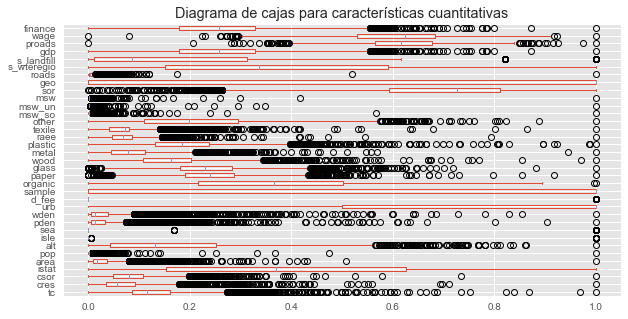

In [25]:
df_numeric_scale.plot(
    kind='box', 
    figsize=(10, 5), 
    vert=False)

plt.title('Diagrama de cajas para características cuantitativas')
plt.show()

In [26]:
lof = LocalOutlierFactor(
    n_neighbors=5, 
    algorithm='auto', 
    contamination='auto', 
    metric='euclidean') 

filt = lof.fit_predict(df_numeric_scale)

ground_truth = np.ones(len(df_numeric_scale), dtype = int) 

n_errors = (filt != ground_truth).sum()

n_errors

204

In [27]:
pos = np.where(filt == ground_truth)
pos = np.hstack(pos)

df_filt = df_numeric_scale.loc[pos, :]

print("Número de muestras sin outilers:", df_filt.shape[0])

Número de muestras sin outilers: 4137


## Reducción de dimensionalidad
Una vez realizado la exploración de datos del item anterior, se procede a transformar los datos originales en datos reducidos o embebidos a partir de los algoritmo de reducción de dimensionalidad. Se sugiere utilizar mínimo tres métodos de reducción de dimensionalidad para seleccionar los datos reducidos con el error cuadrático medio más bajo.

### PCA

In [28]:
num_componentes = df_filt.shape[1]

pca = PCA(
    iterated_power='auto', 
    n_components=num_componentes, 
    random_state=17, 
    svd_solver='auto', 
    tol=1e-3, 
    whiten=False)

In [29]:
principal_components = pca.fit_transform(df_filt) 

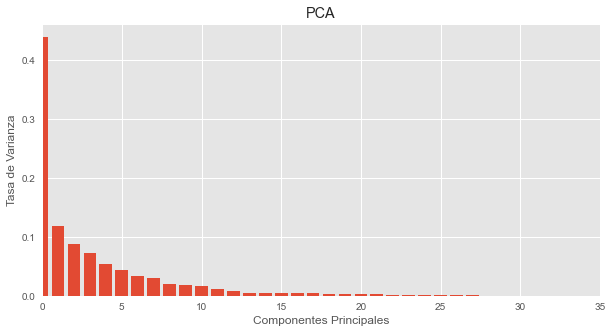

In [30]:
varianza = pca.explained_variance_ratio_ 

fig = plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(varianza)), varianza)
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(varianza))
plt.show()

In [31]:
importancia = pd.DataFrame(varianza)
importancia = importancia.T

lista_pca = []
for i in range(len(varianza)):
    impor = importancia.loc[:, 0:i].sum(axis=1).values * 100
    print(f'Porcentaje de Varianza detectada para las primeras {i + 1} componentes: {impor[0]}')
    lista_pca.append(impor[0])

Porcentaje de Varianza detectada para las primeras 1 componentes: 43.99754639529022
Porcentaje de Varianza detectada para las primeras 2 componentes: 55.87418894574265
Porcentaje de Varianza detectada para las primeras 3 componentes: 64.67810334169553
Porcentaje de Varianza detectada para las primeras 4 componentes: 71.93022678140925
Porcentaje de Varianza detectada para las primeras 5 componentes: 77.25780770235463
Porcentaje de Varianza detectada para las primeras 6 componentes: 81.62448839933867
Porcentaje de Varianza detectada para las primeras 7 componentes: 85.02548376125493
Porcentaje de Varianza detectada para las primeras 8 componentes: 87.95818712013946
Porcentaje de Varianza detectada para las primeras 9 componentes: 89.99866212252581
Porcentaje de Varianza detectada para las primeras 10 componentes: 91.85851553153938
Porcentaje de Varianza detectada para las primeras 11 componentes: 93.55305862512894
Porcentaje de Varianza detectada para las primeras 12 componentes: 94.6550

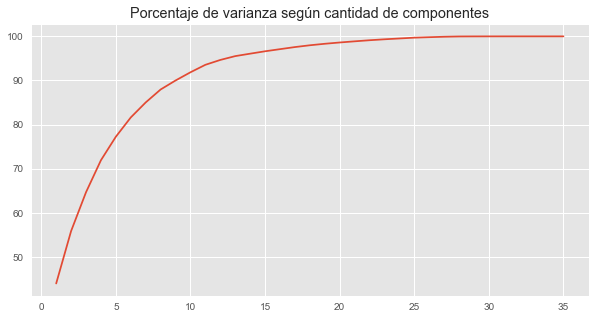

In [32]:
pd.Series(lista_pca, index=range(1, 36)).plot(figsize=(10, 5))

plt.title('Porcentaje de varianza según cantidad de componentes')
plt.show()

In [33]:
componentes_seleccionadas = 14

tasa_varianza = np.sum(varianza[0: componentes_seleccionadas])

Nuevas_Componentes = PCA(
    tasa_varianza, 
    random_state = 17, 
    svd_solver='auto', 
    tol = 1e-3, 
    whiten = False)

df_pca = Nuevas_Componentes.fit_transform(df_filt) 

print('Tamaño de los datos originales con MinMax: ', df_filt.shape) 
print('Tamaño de los datos reducidos: ', df_pca.shape)

Tamaño de los datos originales con MinMax:  (4137, 35)
Tamaño de los datos reducidos:  (4137, 15)


In [34]:
componentes = [f'Componente_{i}' for i in range(1, 16)]

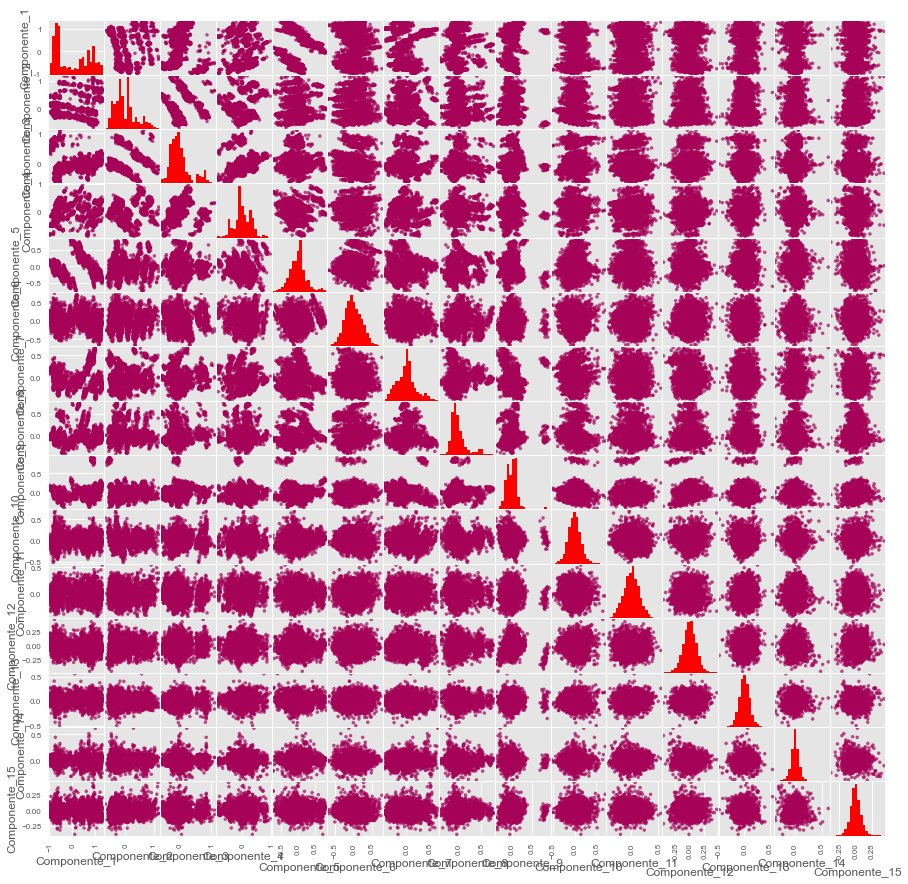

In [35]:
df_pca = pd.DataFrame(df_pca, columns=componentes)
pd.plotting.scatter_matrix(df_pca, 
                           alpha=0.7, 
                           figsize=(15,15),
                           color = 'm', 
                           hist_kwds = {'bins':20, 'color':'red'}) # Grafica de dispersión e histogramas
plt.show()

In [36]:
df_pca

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,Componente_11,Componente_12,Componente_13,Componente_14,Componente_15
0,-0.539735,0.638388,0.999170,0.286790,-0.167351,-0.219219,0.289952,0.143302,0.137701,-0.103599,0.001421,-0.009692,0.037949,-0.058721,0.008530
1,-0.515046,0.607842,1.013269,0.299963,-0.177315,-0.250367,0.326324,0.095434,0.132776,-0.056316,-0.018119,0.081686,0.164913,-0.018399,-0.164764
2,-0.533355,0.595563,1.039524,0.304349,-0.138732,-0.319103,0.281273,0.115093,0.166909,-0.101814,0.118034,0.023849,0.044609,-0.019710,-0.105644
3,1.232119,0.704144,0.036733,-0.034218,-0.360835,0.102221,-0.042649,0.226698,-0.078340,-0.096035,-0.068584,0.006370,0.061727,0.050824,-0.044821
4,-0.776886,-0.185524,0.764930,-0.103543,-0.095270,-0.097767,0.184517,0.081397,0.062064,0.006676,0.056487,0.015023,0.407500,-0.082311,-0.179151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,-0.338131,0.057118,-0.098821,0.092637,-0.179356,-0.106299,-0.069188,-0.293201,-0.048604,0.014369,-0.036050,-0.037912,-0.062612,0.083396,-0.041824
4133,-0.389951,0.051953,-0.087405,0.108423,-0.107319,-0.151935,-0.049668,-0.390033,-0.005415,0.053747,-0.052847,0.077218,-0.018485,-0.062832,-0.085179
4134,-0.361801,0.094893,-0.158878,0.061362,-0.216691,0.005635,-0.039176,-0.267029,-0.114949,0.100800,-0.383474,0.030134,-0.014228,-0.063245,-0.079695
4135,-0.322794,0.059491,-0.097280,0.108419,-0.192554,-0.071153,-0.070759,-0.287214,-0.053344,-0.006097,0.014725,-0.085768,-0.080048,0.079970,-0.030408


### Kernel PCA

In [37]:
kpca = KernelPCA(
    n_components=15, 
    kernel='rbf', 
    fit_inverse_transform=True, 
    gamma=0.1)

In [38]:
variables_principales_kernel = kpca.fit_transform(df_filt)

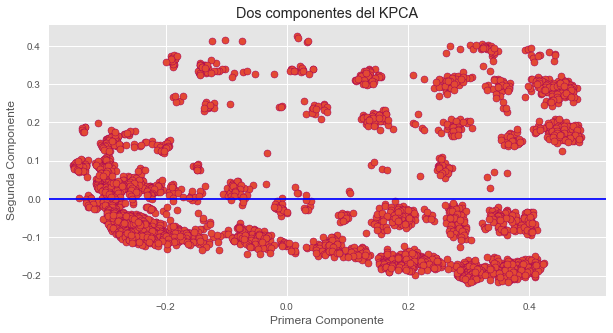

In [39]:
fig = plt.figure(figsize=(10,5)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(variables_principales_kernel[:,0], variables_principales_kernel[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del KPCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

Valores propios del método kernel:  [330.60258372  92.50541587  74.5876529   56.98588921  43.75749701
  34.46843649  27.38159077  24.6391836   17.95800908  14.99972087
  13.45250971   9.43204933   7.04047077   6.6670035    5.66742612]


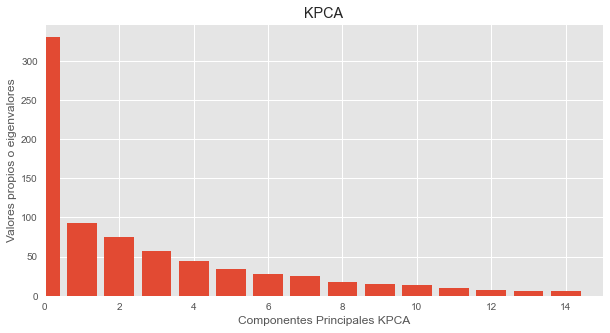

In [40]:
lambdas_kpca = kpca.eigenvalues_ # Calculamos los eigenvalores o valores propios de la matriz kernel centrado en orden decreciente.
print("Valores propios del método kernel: ", lambdas_kpca)

fig = plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(lambdas_kpca)), lambdas_kpca)
plt.xlabel('Componentes Principales KPCA')
plt.ylabel('Valores propios o eigenvalores')
plt.title('KPCA')
plt.xlim(0, len(lambdas_kpca))
plt.show()

In [41]:
componentes = 10
kpca_main = KernelPCA(n_components=componentes, 
                      kernel='linear', 
                      fit_inverse_transform=True, 
                      gamma=0.1)
datos_kernel = kpca_main.fit_transform(df_filt)
print('Tamaño de los datos originales con MinMax: ', df_filt.shape)
print('Tamaño de los datos reducidos con Kernel PCA: ', datos_kernel.shape)

Tamaño de los datos originales con MinMax:  (4137, 35)
Tamaño de los datos reducidos con Kernel PCA:  (4137, 10)


In [42]:
componentes = [f'componente_{i}' for i in range(1, 11)]

In [43]:
datos_kernel = pd.DataFrame(datos_kernel, columns=componentes)

In [44]:
datos_kernel.head()

,componente_1,componente_2,componente_3,componente_4,componente_5,componente_6,componente_7,componente_8,componente_9,componente_10
0,-0.539735,0.638388,0.999170,0.286790,-0.167351,-0.219219,0.289952,0.143302,0.137701,-0.103599
1,-0.515046,0.607842,1.013269,0.299963,-0.177315,-0.250367,0.326324,0.095434,0.132776,-0.056316
2,-0.533355,0.595563,1.039524,0.304349,-0.138732,-0.319103,0.281273,0.115093,0.166909,-0.101814
3,1.232119,0.704144,0.036733,-0.034218,-0.360835,0.102221,-0.042649,0.226698,-0.078340,-0.096035
4,-0.776886,-0.185524,0.764930,-0.103543,-0.095270,-0.097767,0.184517,0.081397,0.062064,0.006676


### Sparse PCA

In [45]:
spca = SparsePCA(n_components=num_componentes, 
                 alpha=0.1, 
                 ridge_alpha=0.01, 
                 random_state=17, 
                 max_iter=1000, 
                 tol=1e-3)

In [46]:
variables_principales_sparse = spca.fit_transform(df_filt)

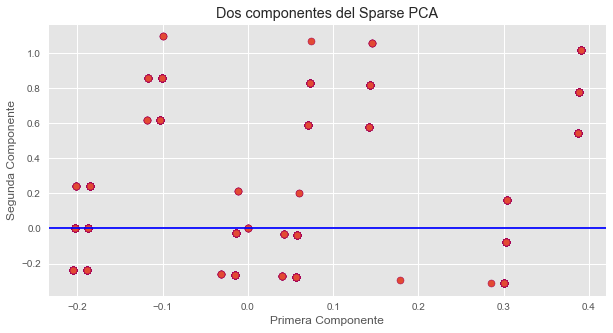

In [47]:
fig = plt.figure(figsize=(10,5))

plt.scatter(variables_principales_sparse[:,0], variables_principales_sparse[:,1], edgecolors="m")
plt.axhline(0, color="blue") 
plt.title('Dos componentes del Sparse PCA') 
plt.xlabel('Primera Componente') 
plt.ylabel('Segunda Componente') 
plt.show()

In [48]:
promedio = np.mean(spca.components_ == 0)
print('Valor promedio de esparcimiento con todas las componentes = {:.3f}'.format(promedio))

Valor promedio de esparcimiento con todas las componentes = 0.962


In [49]:
lista = []
for i in range(1, df_filt.shape[1] + 1):
    spca_2 = SparsePCA(
        n_components=i, 
        alpha=0.5, 
        ridge_alpha=0.05, 
        random_state=17, 
        max_iter=1000, 
        tol=1e-3)
    Datos_SPCA_2 = spca_2.fit_transform(df_filt)
    promedio_2 = np.mean(spca_2.components_ == 0)
    lista.append(promedio_2)

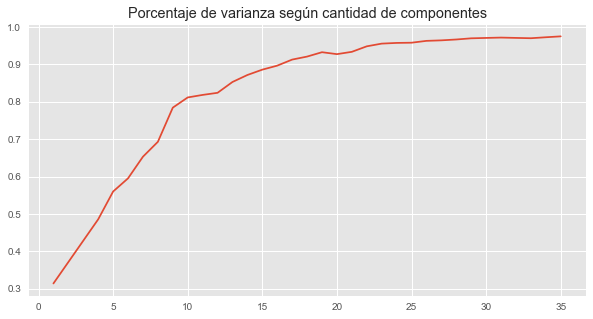

In [50]:
pd.Series(lista, index=range(1, 36)).plot(figsize=(10, 5))

plt.title('Porcentaje de varianza según cantidad de componentes')
plt.show()

In [51]:
spca_2 = SparsePCA(n_components=25, 
                   alpha=0.5, 
                   ridge_alpha=0.05, 
                   random_state=17, 
                   max_iter=1000, 
                   tol=1e-3)
Datos_SPCA_2 = spca_2.fit_transform(df_filt)
promedio_2 = np.mean(spca_2.components_ == 0)

In [52]:
promedio_2

0.9577142857142857

In [53]:
print('Tamaño de los datos originales con MinMax: ', df_filt.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos con Sparse PCA: ', Datos_SPCA_2.shape)

Tamaño de los datos originales con MinMax:  (4137, 35)
Tamaño de los datos reducidos con Sparse PCA:  (4137, 25)


## Análisis de Cluster
A partir del item anterior, se desea obtener el mejor agrupamiento de datos. Para esta tarea, se propone hacer una comparación entre:

1.   Agrupamiento de datos con los datos limpios del item "Exploración de Datos".
2.   Agrupamiento de datos con los datos reducidos del item "Reducción de Dimensionalidad".

A partir de los dos casos, se debe analizar la calidad del agrupamiento con índices de validación interno.

### Datos explorados

In [54]:
error = 1e-4
max_iteraciones = 5000

C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

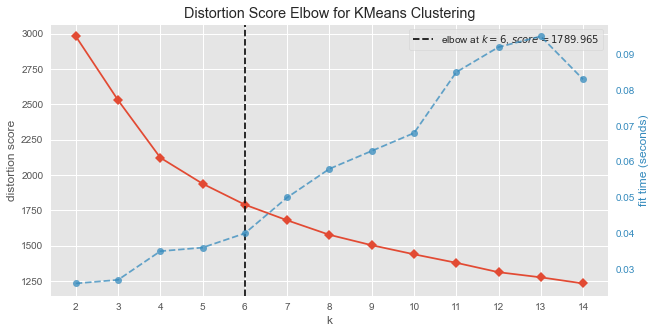

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

elbow = KElbowVisualizer(
    KMeans(max_iter=max_iteraciones, 
           tol=error, 
           random_state = 17),
    k=(2, 15), 
    ax=ax)

elbow.fit(df_filt)
ax.set_xticks(range(2, 15))
elbow.show()
plt.show()

In [56]:
clusters = 6

kmeans_df = KMeans(
    n_clusters=clusters,
    max_iter=max_iteraciones,
    tol=error,
    random_state = 17)

In [57]:
kmeans_df.fit(df_filt)

C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=5000, n_clusters=6, random_state=17)

In [58]:
labels = kmeans_df.labels_
centroids = kmeans_df.cluster_centers_

In [59]:
silhouette_avg = silhouette_score(df_filt, kmeans_df.labels_)
print("El coeficiente de silueta es:", silhouette_avg)

El coeficiente de silueta es: 0.24116255649284055


In [60]:
ch_score = calinski_harabasz_score(df_filt, kmeans_df.labels_)
print("La puntuación Calinski-Harabasz es:", ch_score)

La puntuación Calinski-Harabasz es: 1421.002371373792


In [61]:
db_score = davies_bouldin_score(df_filt, kmeans_df.labels_)
print("La puntuación Davies-Bouldin es:", db_score)

La puntuación Davies-Bouldin es: 1.5441536715945345


In [62]:
df_filt['clusters'] = labels

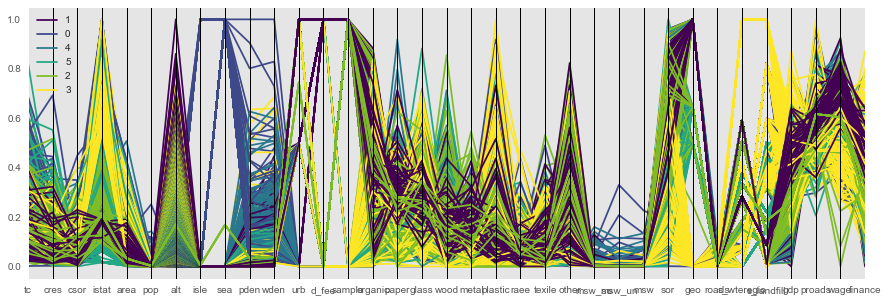

In [63]:
plt.figure(figsize=(15, 5))
colors = ('#440154', '#3e4989', '#2a788e', '#22a884', '#7ebd26', '#fde725')
pd.plotting.parallel_coordinates(df_filt, 'clusters', color=colors)
plt.legend(loc="best")
plt.show()

### Dimensionalidad

C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

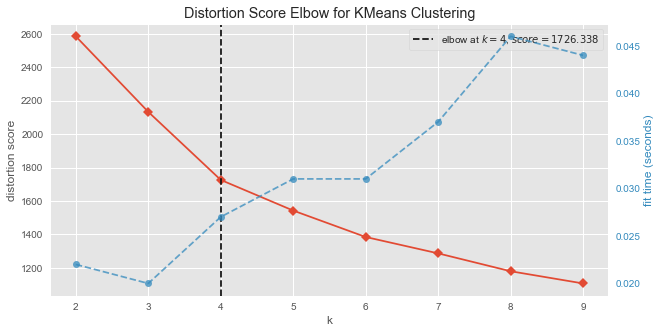

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))

elbow = KElbowVisualizer(
    KMeans(max_iter=max_iteraciones, 
           tol=error, 
           random_state = 17),
    k=(2, 10), 
    ax=ax)

elbow.fit(datos_kernel)
ax.set_xticks(range(2, 10))
elbow.show()
plt.show()

In [65]:
clusters = 4

kmeans = KMeans(
    n_clusters=clusters,
    max_iter=max_iteraciones,
    tol=error,
    random_state = 17)

In [66]:
kmeans.fit(datos_kernel)

C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=5000, n_clusters=4, random_state=17)

In [67]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [68]:
silhouette_avg = silhouette_score(datos_kernel, labels)
print("El coeficiente de silueta es:", silhouette_avg)

El coeficiente de silueta es: 0.372247986307484


In [69]:
ch_score = calinski_harabasz_score(datos_kernel, labels)
print("La puntuación Calinski-Harabasz es:", ch_score)

La puntuación Calinski-Harabasz es: 2191.273531566164


In [70]:
db_score = davies_bouldin_score(datos_kernel, labels)
print("La puntuación Davies-Bouldin es:", db_score)

La puntuación Davies-Bouldin es: 1.1846530374102093


In [71]:
datos_kernel['clusters'] = labels

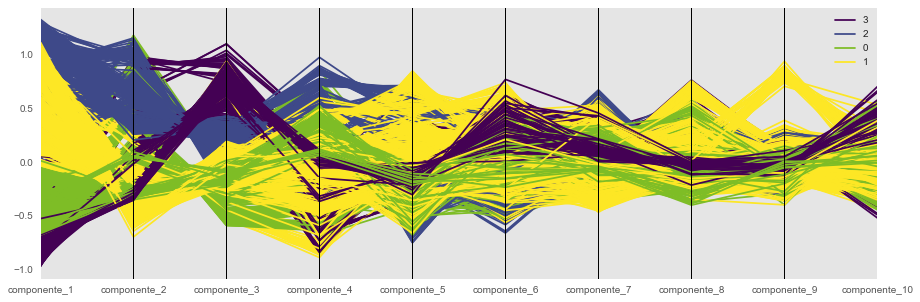

In [72]:
plt.figure(figsize=(15, 5))
colors = ('#440154', '#3e4989', '#7ebd26', '#fde725')
pd.plotting.parallel_coordinates(datos_kernel, 'clusters', color=colors)
plt.legend(loc="best")
plt.show()

## Conclusiones

Este dataset de predicción de costos de gestión de residuos municipales contiene información sobre diversas variables relacionadas con los municipios y su gestión de residuos, incluyendo costos residuales y clasificados por habitante, la población y densidad poblacional, los índices de urbanización, los esquemas de tarifas, los porcentajes de residuos orgánicos, papel, vidrio, madera, metal, plástico, textil y otros tipos de residuos, así como la cantidad de residuos sólidos municipales y la cantidad de kilómetros de carreteras dentro de los municipios. La salida es el costo por habitante en euros.

Inicialmente, se realiza el trabajo de analisis exploratorio, buscando valores faltantes, en este apartado se encuentra que el $3.77\%$ de los datos son faltantes. Por lo que se procede a realizar imuputación simple.

Se divide el conjunto de datos en numéricos y categóricos. Se encontraron $6$ valores faltantes en la característica `name`. Aunque se realiza la imputación por moda, se concluye que para este conjunto de datos no es necesario, ya que esos valores se pueden mapear desde la dirección.

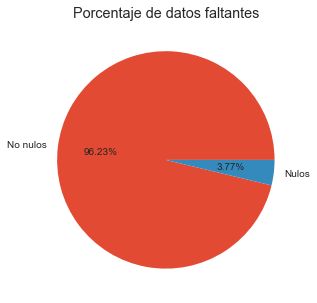

In [73]:
faltantes_total = df_faltantes['Faltantes'].sum()
registros_total = df.shape[0] * df.shape[1]

plt.figure(figsize=(5, 5))
datos = [registros_total - faltantes_total, faltantes_total]
label = ['No nulos', 'Nulos']

plt.pie(datos, labels=label, autopct='%.2f%%')
plt.title('Porcentaje de datos faltantes')
plt.show()

Para detectar datos atípicos en el conjunto de datos, se utilizó el algoritmo LOF (Local Outlier Factor) después de haber escalado las variables para asegurarnos de que todas las variables tuvieran la misma importancia en el análisis. LOF se basa en la idea de que los puntos atípicos son aquellos que tienen una densidad local más baja que sus vecinos. El algoritmo asigna a cada punto un valor LOF, que es una medida de cuán diferente es la densidad local del punto en comparación con la densidad local de sus vecinos. Los puntos con un valor LOF alto son considerados como datos atípicos, mientras que los puntos con un valor LOF bajo son considerados como puntos normales.

Se encuentran $204$ registros atipicos y son eliminados del dataset.

Se utilizó una combinación de técnicas de reducción de dimensionalidad para reducir la complejidad del conjunto de datos y mejorar la eficiencia del análisis. Se aplicó el análisis de componentes principales (PCA), kernel PCA y Sparse PCA para reducir el número de variables a un conjunto más manejable de componentes principales. Se encontró que con PCA se obtuvieron 15 componentes principales, con kernel PCA se redujo a 10 y con Sparse PCA se redujo aún más a 30. Los resultados indican que la combinación de estas técnicas de reducción de dimensionalidad puede ser efectiva en la reducción del ruido y la eliminación de características irrelevantes o redundantes del conjunto de datos original, permitiendo un análisis más enfocado y preciso.

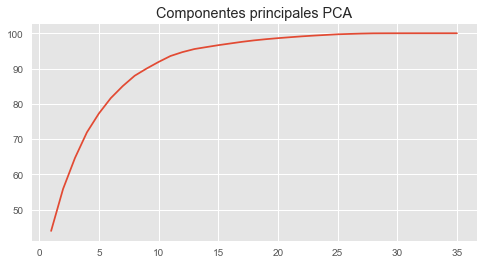

In [75]:
pd.Series(lista_pca, index=range(1, 36)).plot(figsize=(8, 4))

plt.title('Componentes principales PCA')
plt.show()

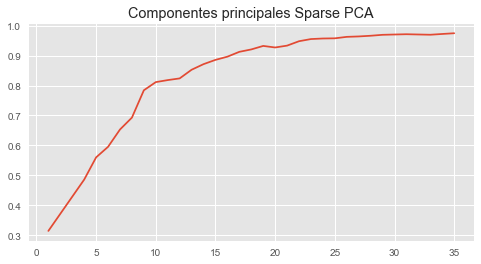

In [77]:
pd.Series(lista, index=range(1, 36)).plot(figsize=(8, 4))

plt.title('Componentes principales Sparse PCA')
plt.show()

Se decide tomar la reducción de dimensionalidad de Kernel PCA, con un total de 10 caracteristica

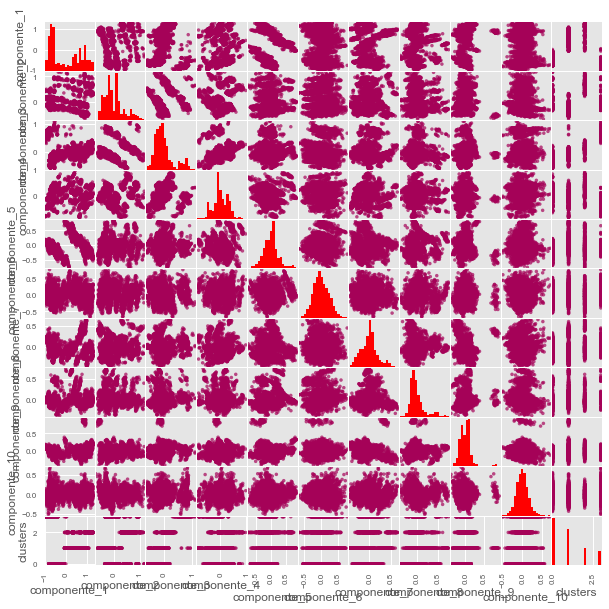

In [80]:
pd.plotting.scatter_matrix(
    datos_kernel, 
    alpha=0.7, 
    figsize=(10, 10),
    color = 'm', 
    hist_kwds = {'bins':20, 'color':'red'})
plt.show()

Finalmente, se realiza analisis cluster. En este apartado se realiza este analisis a los datos normalizados y al resultado de la reducción de dimensionalidad.

Los resultados obtenidos del análisis cluster de las 35 caracteristicas con un total de $6$ cluster. Sin embargo, es importante mencionar que los resultados no son los esperados, ya que un coeficiente de silueta de 0.24 indica que los clusters están solapados y la separación entre ellos no es muy clara. Además, una puntuación Davies-Bouldin mayor a 1 indica que los clusters no están bien separados, mientras que una puntuación Calinski-Harabasz alta indica una buena separación entre los clusters. Por lo tanto, se requiere de más exploración y análisis para entender las razones detrás de estos resultados y encontrar una solución para mejorar el análisis cluster.

Con un coeficiente de silueta de $0.37$, una puntuación Calinski-Harabasz de $2191.27$ y una puntuación Davies-Bouldin de $1.18$, se puede concluir que el análisis de clustering ha sido más efectivo que en los resultados anteriores. El coeficiente de silueta es más alto, lo que indica una mejor separación de los clusters. La puntuación Calinski-Harabasz también ha aumentado significativamente, lo que sugiere una mayor cohesión dentro de los clusters y una mayor separación entre ellos. Por último, la puntuación Davies-Bouldin ha disminuido, lo que indica una mejor distinción entre los clusters. En resumen, estos resultados sugieren que la reducción de dimensionalidad mediante PCA, kernel PCA y Sparse PCA ha sido efectiva para este conjunto de datos y que el análisis de clustering ha permitido identificar patrones interesantes en los datos.

Para le visualización de los clusters se decició implementar parallel coordinates:

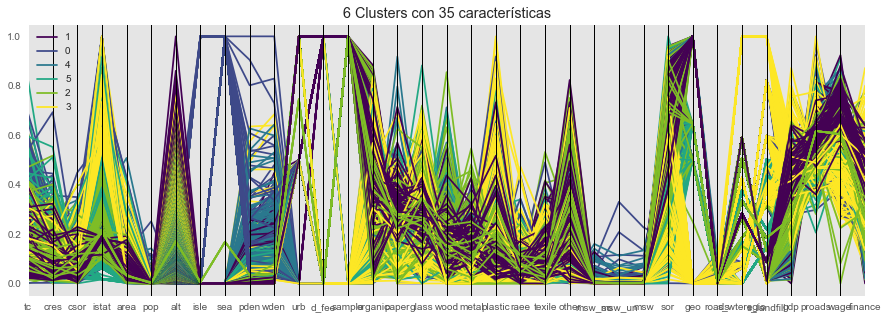

In [81]:
plt.figure(figsize=(15, 5))
colors = ('#440154', '#3e4989', '#2a788e', '#22a884', '#7ebd26', '#fde725')
pd.plotting.parallel_coordinates(df_filt, 'clusters', color=colors)
plt.legend(loc="best")
plt.title('6 Clusters con 35 características')
plt.show()

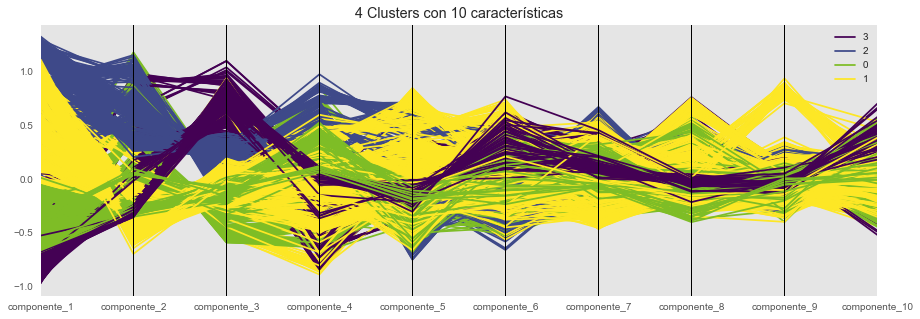

In [82]:
plt.figure(figsize=(15, 5))
colors = ('#440154', '#3e4989', '#7ebd26', '#fde725')
pd.plotting.parallel_coordinates(datos_kernel, 'clusters', color=colors)
plt.legend(loc="best")
plt.title('4 Clusters con 10 características')
plt.show()